<a href="https://colab.research.google.com/github/nomchanz/graduation_thesis_new/blob/main/seed%E5%9B%BA%E5%AE%9A12_31code_save.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
## 必要なライブラリのimport
import csv
import random
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, BatchNormalization
from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [47]:
## データについて

### データフイルのpath
no_hole_path = 'no_hole_data.csv'
one_hole_size_path = 'one_hole_size_data.csv'
one_hole_position_path = 'one_hole_position_data.csv'
four_holes_size_path = 'four_holes_size_data.csv'
four_holes_position_path = 'four_holes_position_data.csv'
nine_holes_size_path = 'nine_holes_size_data.csv'
nine_holes_position_path = 'nine_holes_position_data.csv'
sixteen_holes_size_path = 'sixteen_holes_size_data.csv'
sixteen_holes_position_path = 'sixteen_holes_position_data.csv'
twentyfive_holes_size_path = 'twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = 'twentyfive_holes_position_data.csv'

#### 穴0データ
with open(no_hole_path) as f0:
  lst_f0 = list(csv.reader(f0))

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  lst_fs1 = list(csv.reader(fs1))
with open(four_holes_size_path) as fs2:
  lst_fs2 = list(csv.reader(fs2))
with open(nine_holes_size_path) as fs3:
  lst_fs3 = list(csv.reader(fs3))
with open(sixteen_holes_size_path) as fs4:
  lst_fs4 = list(csv.reader(fs4))
with open(twentyfive_holes_size_path) as fs5:
  lst_fs5 = list(csv.reader(fs5))

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  lst_fp1 = list(csv.reader(fp1))
with open(four_holes_position_path) as fp2:
  lst_fp2 = list(csv.reader(fp2))
with open(nine_holes_position_path) as fp3:
  lst_fp3 = list(csv.reader(fp3))
with open(sixteen_holes_position_path) as fp4:
  lst_fp4 = list(csv.reader(fp4))
with open(twentyfive_holes_position_path) as fp5:
  lst_fp5 = list(csv.reader(fp5))

n = 1000
a = 0

random.seed(a)

lst_fs1 = random.sample(lst_fs1, int(n/5))
lst_fs2 = random.sample(lst_fs2, int(n/5))
lst_fs3 = random.sample(lst_fs3, int(n/5))
lst_fs4 = random.sample(lst_fs4, int(n/5))
lst_fs5 = random.sample(lst_fs5, int(n/5))
lst_fp1 = random.sample(lst_fp1, int(n/5))
lst_fp2 = random.sample(lst_fp2, int(n/5))
lst_fp3 = random.sample(lst_fp3, int(n/5))
lst_fp4 = random.sample(lst_fp4, int(n/5))
lst_fp5 = random.sample(lst_fp5, int(n/5))

lst_f0 = [r[:-1] for r in lst_f0]
lst_x_fs1 = [r[0] for r in lst_fs1]
lst_x_fs2 = [r[0] for r in lst_fs2]
lst_x_fs3 = [r[0] for r in lst_fs3]
lst_x_fs4 = [r[0] for r in lst_fs4]
lst_x_fs5 = [r[0] for r in lst_fs5]
lst_x_fp1 = [r[0] for r in lst_fp1]
lst_x_fp2 = [r[0] for r in lst_fp2]
lst_x_fp3 = [r[0] for r in lst_fp3]
lst_x_fp4 = [r[0] for r in lst_fp4]
lst_x_fp5 = [r[0] for r in lst_fp5]
lst_y1 = [r[1:-1] for r in lst_fp1]
lst_y2 = [r[1:-1] for r in lst_fp2]
lst_y3 = [r[1:-1] for r in lst_fp3]
lst_y4 = [r[1:-1] for r in lst_fp4]
lst_y5 = [r[1:-1] for r in lst_fp5]

lst_x_fs = lst_x_fs1 + lst_x_fs2 + lst_x_fs3 + lst_x_fs4 + lst_x_fs5
lst_x_fp = lst_x_fp1 + lst_x_fp2 + lst_x_fp3 + lst_x_fp4 + lst_x_fp5
lst_x = lst_x_fs + lst_x_fp
lst_y = lst_y1 + lst_y2 + lst_y3 + lst_y4 + lst_y5

lst_f0 = np.array(lst_f0, dtype=float)
lst_x = np.array(lst_x, dtype=int)
lst_y = np.array(lst_y, dtype=float)

lst_x = lst_x.reshape(2,n)
lst_x = lst_x.T
lst_y = lst_y - lst_f0

### train用とtest用に分割(4:1)
x_train, x_test, y_train, y_test = train_test_split(lst_x, lst_y, train_size= 0.8, test_size=0.2)

x_train = x_train.reshape(int(n*0.8),2,1)
x_test = x_test.reshape(int(n*0.2),2,1)

In [48]:
x_train

array([[[ 3],
        [ 6]],

       [[ 1],
        [21]],

       [[ 1],
        [24]],

       ...,

       [[ 3],
        [ 1]],

       [[ 1],
        [17]],

       [[ 5],
        [ 7]]])

In [ ]:
## CNN

### modelの作成
model = Sequential()
### 畳み込み層
model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(2, 1)))
### プーリング層
model.add(MaxPooling1D(2, padding='same'))
### 全結合層
model.add(Dense(50, activation='linear'))
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [ ]:
# 学習
epochs = 4000
batch_size = 64
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 1501/4000
13/13 [==============================] - 0s 10ms/step - loss: 0.4422 - mae: 0.2426 - val_loss: 0.2449 - val_mae: 0.2326
Epoch 1502/4000
13/13 [==============================] - 0s 10ms/step - loss: 0.4495 - mae: 0.2495 - val_loss: 0.2448 - val_mae: 0.2326
Epoch 1503/4000
13/13 [==============================] - 0s 10ms/step - loss: 0.6086 - mae: 0.2789 - val_loss: 0.2449 - val_mae: 0.2327
Epoch 1504/4000
13/13 [==============================] - 0s 8ms/step - loss: 0.5866 - mae: 0.2523 - val_loss: 0.2449 - val_mae: 0.2326
Epoch 1505/4000
13/13 [==============================] - 0s 9ms/step - loss: 0.5670 - mae: 0.2530 - val_loss: 0.2448 - val_mae: 0.2326
Epoch 1506/4000
13/13 [==============================] - 0s 10ms/step - loss: 0.3533 - mae: 0.2429 - val_loss: 0.2447 - val_mae: 0.2325
Epoch 1507/4000
13/13 [==============================] - 0s 10ms/step - loss: 0.3225 - mae: 0.2370 - val_loss: 0.2446 - val_mae: 0.2325
Epoch 1508/4000
13

In [ ]:
# モデルの評価
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.2449 - mae: 0.2324
Test loss: 0.24490471184253693
Test mae: 0.23241016268730164


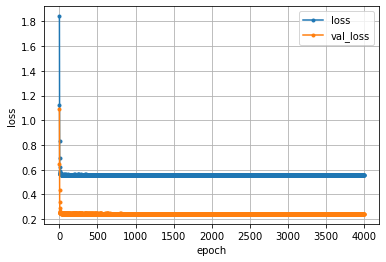

In [ ]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>2: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

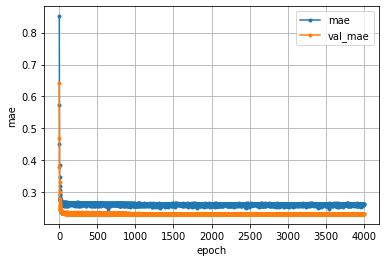

In [ ]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>2: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [ ]:
model.save(str(i)+"_random.seed("+str(j)+").h5")

In [ ]:
## CNN

### modelの作成
model_BN = Sequential()
### 畳み込み層
model_BN.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(2, 1)))
### プーリング層
model_BN.add(MaxPooling1D(2, padding='same'))
### 全結合層
model_BN.add(Dense(50, activation='linear'))
### バッチ正規化層
model_BN.add(BatchNormalization(epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model_BN.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [42]:
# 学習
epochs = 4000
batch_size = 64
history = model_BN.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 2751/4000
13/13 [==============================] - 0s 10ms/step - loss: 0.3702 - mae: 0.2516 - val_loss: 0.2447 - val_mae: 0.2325
Epoch 2752/4000
13/13 [==============================] - 0s 10ms/step - loss: 0.8065 - mae: 0.2875 - val_loss: 0.2447 - val_mae: 0.2325
Epoch 2753/4000
Epoch 2753/4000
13/13 [==============================] - 0s 11ms/step - loss: 0.3781 - mae: 0.2480 - val_loss: 0.2447 - val_mae: 0.2325
Epoch 2754/4000
13/13 [==============================] - 0s 9ms/step - loss: 0.6525 - mae: 0.2641 - val_loss: 0.2448 - val_mae: 0.2325
Epoch 2755/4000
13/13 [==============================] - 0s 10ms/step - loss: 0.4331 - mae: 0.2550 - val_loss: 0.2450 - val_mae: 0.2326
Epoch 2756/4000
Epoch 2756/4000
13/13 [==============================] - 0s 11ms/step - loss: 0.5634 - mae: 0.2718 - val_loss: 0.2451 - val_mae: 0.2326
Epoch 2757/4000
13/13 [==============================] - 0s 12ms/step - loss: 0.4458 - mae: 0.2568 - val_loss: 0.2451 - v

In [43]:
# モデルの評価
score = model_BN.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.2448 - mae: 0.2323
Test loss: 0.2447909712791443
Test mae: 0.23234568536281586
7/7 [==============================] - 0s 2ms/step - loss: 0.2448 - mae: 0.2323
Test loss: 0.2447909712791443
Test mae: 0.23234568536281586


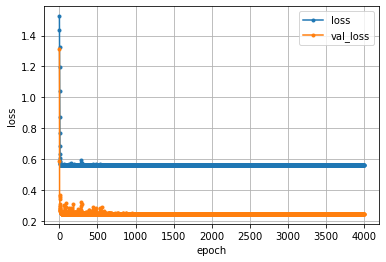

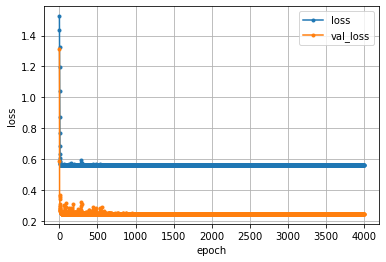

In [44]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>2: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

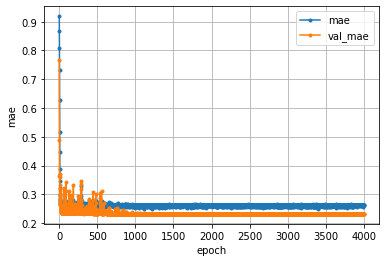

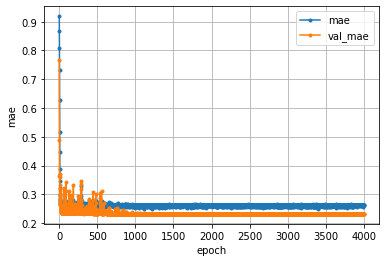

In [45]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>2: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [ ]:
model.save(str(i)+"_random.seed("+str(j)+")_BN.h5")